This notebook is used to compile all our models and compare them along with some standardized format. Make sure your code output fits as input to this standardized format, such that it only needs to be imported and can run from the get-go.

I'll also build some plotter to make this work well and of course ensure there is proper docstrings and comments

(If you want to make your folder importable, like I did with Code_Emiel, simply add an empty __init__.py to the folder)

In [1]:
import os
import sys

sys.path.append(os.getcwd())

In [ ]:
# Standard format

from typing import List
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class StandardFormat:
    def __init__(self, n_samples):
        self.detected_outliers = {}
        self.confidences = {}
        self.n_samples = n_samples

    def add_outlier_samples(self, model_name: str, outliers: List[str]):
        """
        model_name: str = the name of your model of which you want to add the outliers to the pool

        outliers: list = the list of sample/measurement names (don't add anything else besides that, just the names of the samples (sample_1, sample_4567, etc)) (the length of the list doesn't matter, it can be any length, ensuring the alpha is 0.05)

        Call this function to add identified samples to the data pool
        With that I mean the following:
        with a certain alpha value, you select which samples are identified to be outliers.

        For this alpha, make sure you take 0.05! (standard alpha value)

        This is important, else we're comparing apples with oranges.
        """
        
        assert all(isinstance(item, str) for item in outliers), "Outliers should be a list of strings"
        self.detected_outliers.update({model_name: outliers})

    def add_confidences(self, model_name: str, confidences: List[float]):
        """
        model_name: str = the name of your model of which you want to add the confidences to the pool

        confidences: list = the list of confidence values (probabilities between 0 and 1 that this sample or measurement is an outlier) (don't add anything else besides that, just the confidence values)

        Call this function to add identified samples to the data pool
        We're specifically NOT working with alpha values in this one
        Ensure that the raw confidence values of something being an outlier are added here
        What is the confidence value? A probability between 0 and 1 that this sample or measurement is an outlier, with 1 being fully confident that it IS an outlier, and vice versa.
    
        Ensure that the length of the confidences list is the same as the length of the entire dataset (so make sure that all samples are in the list, and nothing more or less. I will assert this, it will crash if the length is off!).
        """
        if self.n_samples is not None and len(confidences) != self.n_samples:
            raise ValueError(f"Expected {self.n_samples} confidences, got {len(confidences)}")
        self.confidences.update({model_name: confidences})

    def compute_similarity_scores_detected_outliers(self, plot_results: bool = False):
        models = list(self.detected_outliers)
        M = len(models)
        matrix = np.zeros((M, M), dtype=float)

        for i, model_name in enumerate(models):
            si = set(self.detected_outliers[model_name])
            for j, other_model_name in enumerate(models):
                if i == j:
                    matrix[i, j] = np.nan  # Diagonal can be set to NaN or 0 as preferred
                else:
                    sj = set(self.detected_outliers[other_model_name])
                    union = len(si | sj)
                    matrix[i, j] = (len(si & sj) / union) if union else np.nan

        if plot_results:
            fig, ax = plt.subplots()
            cax = ax.imshow(matrix, cmap='viridis', interpolation='nearest')
            fig.colorbar(cax, ax=ax)
            ax.set_xticks(range(M))
            ax.set_xticklabels(models, rotation=90)
            ax.set_yticks(range(M))
            ax.set_yticklabels(models)
            ax.set_title("Similarity Matrix of Detected Outliers", pad=20)
            plt.show()
        return models, matrix

    def compute_similarity_scores_confidences(self, plot_results: bool = False):
        models = list(self.confidences)
        X = np.vstack([self.confidences[m] for m in models])
        matrix = cosine_similarity(X)
        np.fill_diagonal(matrix, np.nan)

        if plot_results:
            fig, ax = plt.subplots()
            cax = ax.imshow(matrix, cmap='viridis', interpolation='nearest')
            fig.colorbar(cax)
            ax.set_xticks(range(len(models)))
            ax.set_xticklabels(models, rotation=90)
            ax.set_yticks(range(len(models)))
            ax.set_yticklabels(models)
            ax.set_title("Similarity Matrix of Confidences", pad=20)
            plt.show()
        return models, matrix

standard_format = StandardFormat(20447)

**Emiel's code:**

Max: 3700.222357665773 Min: 0.010065982414065654
[ 1852. 16741. 10092. ... 17519. 14304.   214.]
382 outliers detected from alpha = 0.05:
[   79   109   161   215   237   282   318   345   392   400   402   454
   668   675   684   841   954   955   970   984   988   991   998  1050
  1084  1152  1260  1302  1309  1339  1356  1436  1488  1561  1619  1631
  1822  1845  1887  1889  1890  1896  1909  1948  1971  2012  2082  2176
  2183  2226  2233  2248  2311  2313  2326  2328  2440  2450  2484  2514
  2522  2616  2698  2760  2774  2832  2879  2887  2925  2926  2987  3031
  3056  3073  3136  3173  3298  3375  3384  3503  3538  3539  3551  3555
  3601  3633  3709  3796  3849  3899  3999  4121  4133  4164  4177  4286
  4296  4406  4441  4554  4556  4599  4676  4693  4823  4896  4953  5014
  5064  5076  5104  5135  5157  5188  5199  5214  5227  5287  5349  5408
  5436  5444  5450  5461  5481  5583  5617  5657  5734  5775  5784  5786
  5790  5851  5853  5895  5988  6027  6034  6098  6099  610

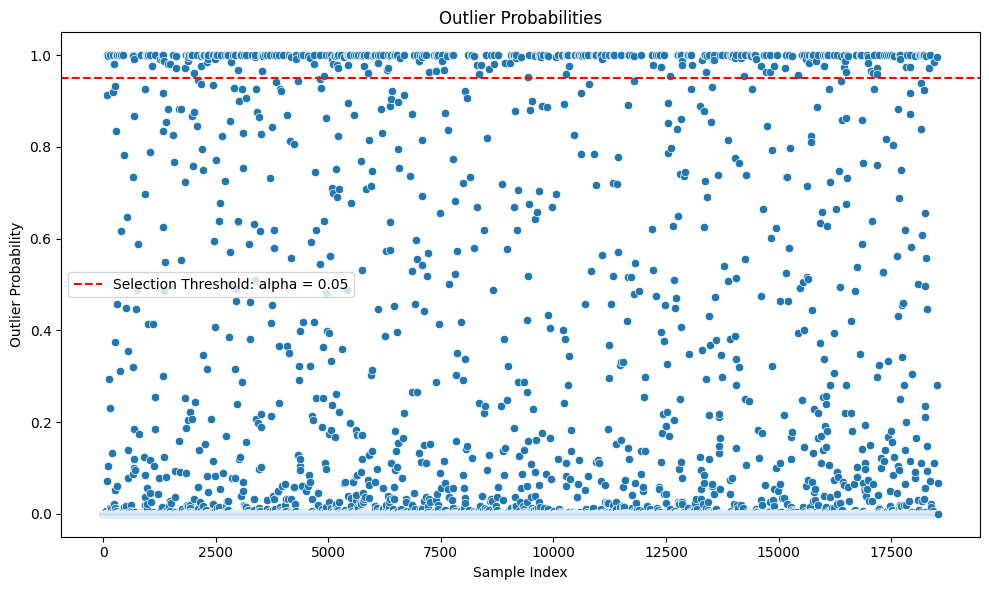

Hello, World!
(18548, 51)
[1] Tolerance: 1e-06	Current error: 0.00017640209120805368
[2] Tolerance: 1e-06	Current error: 0.00017640209120731986
[3] Tolerance: 1e-06	Current error: 0.00017640209120658586
[4] Tolerance: 1e-06	Current error: 0.00017640209120585215
[5] Tolerance: 1e-06	Current error: 0.0001764020912051183
[6] Tolerance: 1e-06	Current error: 0.00017640209120438523
[7] Tolerance: 1e-06	Current error: 0.00017640209120365136
[8] Tolerance: 1e-06	Current error: 0.00017640209120291803
[9] Tolerance: 1e-06	Current error: 0.0001764020912021843
[10] Tolerance: 1e-06	Current error: 0.00017640209120145116
[11] Tolerance: 1e-06	Current error: 0.00017640209120071742
[12] Tolerance: 1e-06	Current error: 0.00012135621415361432
[13] Tolerance: 1e-06	Current error: 5.726162314988544e-05
[14] Tolerance: 1e-06	Current error: 2.7304138051430345e-05
[15] Tolerance: 1e-06	Current error: 1.3512874815268625e-05
[16] Tolerance: 1e-06	Current error: 7.519528622188232e-06
[17] Tolerance: 1e-06	Curre

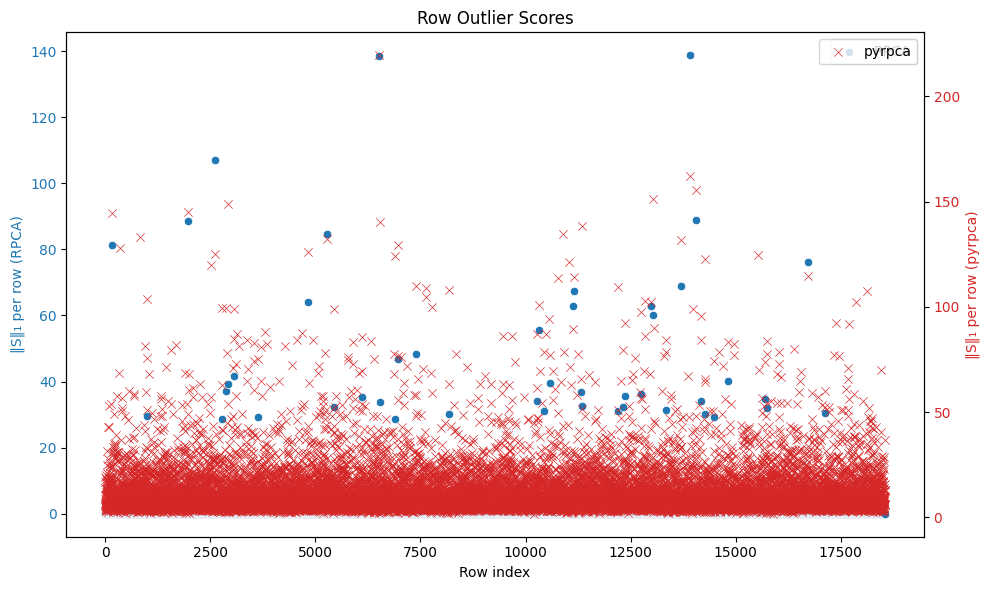

✓ Suspect rows exported to 'Code_Emiel/Output/RPCA suspect_samples.xlsx'.
Hi


In [ ]:
from Code_Emiel import Elliptic_Envelope as elliptic_envelope_emiel
from Code_Emiel import Robust_PCA as rpca_emiel

outliers, confidences = elliptic_envelope_emiel.main()
standard_format.add_outlier_samples("Elliptic Envelope Emiel", outliers)
standard_format.add_confidences("Elliptic Envelope Emiel", confidences)

outliers, confidences = rpca_emiel.main()
standard_format.add_outlier_samples("Robust PCA Emiel", outliers)
standard_format.add_confidences("Robust PCA Emiel", confidences)

**Nicolas' code:**

**Abhinav's code:**

**Patricia's code:**

**Run Evaluation**

In [ ]:
standard_format.compute_similarity_scores_detected_outliers(plot_results=True)
standard_format.compute_similarity_scores_confidences(plot_results=True)